### Stochastic Gradient Descent 
SGD tries to solve the main problem in Batch Gradient descent which is the usage of whole training data to calculate gradients at each step. SGD is stochastic in nature i.e. it picks up a “random” instance of training data at each step and then computes the gradient, making it much faster as there is much fewer data to manipulate at a single time, unlike Batch GD.

In [2]:
import numpy as np
np.random.seed(42)

m = 100 # number of instances
X = 2 * np.random.rand(m,1) # column-vector
y = 4 + 3*X + np.random.rand(m,1) # column-vector

In [3]:
from sklearn.preprocessing import add_dummy_feature
X_b = add_dummy_feature(X) # add X0=1 to each instance

In [4]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperperameters

In [5]:
def learning_schedule(t):
    return t0/(t+t1)

In [6]:
theta = np.random.rand(2,1)
theta

array([[0.64203165],
       [0.08413996]])

In [9]:
epoch_list = []
cost_list = []

In [10]:
for epoch in range(n_epochs):
    for iteration in range(m):
        y_predicted = y_predicted = X_b @ theta
        
        random_index = np.random.randint(m)
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index+1]
        gradients = 2* xi.T @ (xi @ theta-yi) 
        eta = learning_schedule(epoch*m+iteration)
        theta = theta- eta*gradients
        
        cost = np.mean(np.square(y - y_predicted))
        if epoch%10==0:
            epoch_list.append(epoch)
            cost_list.append(cost)

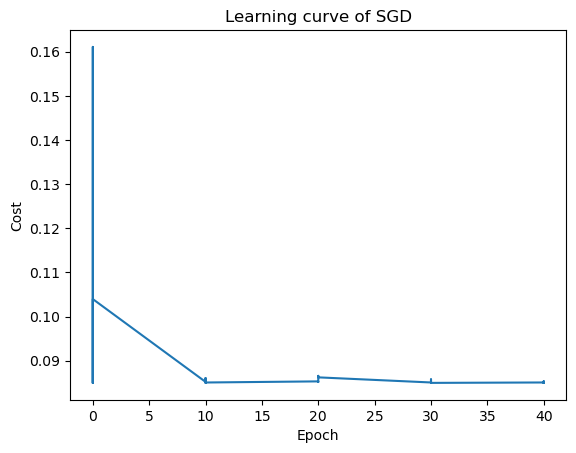

In [11]:
import matplotlib.pyplot as plt
plt.title("Learning curve of SGD")
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list, cost_list)
plt.show()

In [8]:
theta

array([[4.51974833],
       [2.98531929]])

There is a downside of the Stochastic nature of SGD i.e. once it reaches close to the minimum value then it doesn’t settle down, instead bounces around which gives us a good value for model parameters but not optimal which can be solved by reducing the learning rate at each step which can reduce the bouncing and SGD might settle down at global minimum after some time.